In [17]:
import numpy as np
import pandas as pd
import plotly.express as px

In [18]:
# Load the CSV file, without skipping any rows initially
file_path = "/Users/javanmardi/Work/IGSB/Bone2Gene_Survey_Study/3_progressive_results/B2G Survey_7_7_2024.csv"
initial_df = pd.read_csv(file_path, sep=';', header=None)

In [19]:
# Set the first row as the header of the dataframe
headers = initial_df.iloc[0]
questions = initial_df.iloc[1]
header_question_dict = dict(zip(headers, questions))

In [20]:
# Now, read the CSV again, this time skipping the first three rows and setting the first row as header
data_df = pd.read_csv(file_path, sep=';', skiprows=[1, 2])

# Show the first few rows of the dataframe to verify
# print("\nData Preview:")
data_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q29,Q30,Q26,Q31,Q32,Q33,Q34,Q35,Q36,Q39
0,03.03.24 08:54,03.03.24 08:59,IP Address,91.21.244.172,49.0,255.0,False,10.03.24 09:59,R_GsjgGtb1iWqA3lY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20.03.24 23:39,20.03.24 23:51,IP Address,149.171.5.177,100.0,707.0,True,20.03.24 23:51,R_G1NYUbKm3zBogud,NaN,...,NaN,NaN,LLMs for more efficient knowledge retrieval fr...,Yes,"Data privacy and security,Compliance with medi...",NaN,Very concerned,Very important,explainability is less of an issue if diagnosi...,andreas.zankl@sydney.edu.au
2,25.03.24 10:51,25.03.24 11:03,IP Address,193.2.253.126,100.0,682.0,True,25.03.24 11:03,R_GfP4WslsdJbXYqA,NaN,...,NaN,NaN,Combining imaging to genetic results interpret...,Yes,Interpretability of AI algorithms,NaN,Somewhat concerned,Very important,/,primoz.kotnik@mf.uni-lj.si
3,26.03.24 09:42,26.03.24 10:14,IP Address,195.113.82.2,100.0,1882.0,True,26.03.24 10:14,R_GWvmaj6KebYNzQ5,NaN,...,NaN,NaN,maybe growth curve assessment,Yes,"Data privacy and security,Compliance with medi...",NaN,"Unsure, need to see research results first.",Slightly important,NaN,NaN
4,27.03.24 11:44,27.03.24 12:04,IP Address,193.206.71.4,100.0,1201.0,True,27.03.24 12:04,R_Gj06bhZ91wFXgsT,NaN,...,NaN,NaN,It could be used to improve the analysis of ge...,Yes,Informed consent for AI-based diagnostics,NaN,Not very concerned,Very important,NaN,NaN


In [21]:
#the finished surveys

finished_df=data_df[data_df['Finished']==True]
finished_df.shape

(93, 54)

In [22]:
# Identify empty columns
empty_columns = finished_df.isna().all()

# Drop empty columns
data = finished_df.drop(columns=empty_columns[empty_columns].index)

***
# Nosology

In [23]:
header_question_dict['Q17']

'According to the 2023 revision of the nosology of genetic skeletal disorders (Unger et al.), there are 41 different groups of skeletal disorders. Please SELECT ALL of the groups that represent the patients for which you, your clinic, and/or your institution provide care.'

In [24]:
data['Q17']

1      FGFR3 chondrodysplasias,Type 2 collagen disord...
2      FGFR3 chondrodysplasias,Type 2 collagen disord...
3      FGFR3 chondrodysplasias,Type 2 collagen disord...
4      FGFR3 chondrodysplasias,Type 2 collagen disord...
5      FGFR3 chondrodysplasias,Spondylometaphyseal dy...
                             ...                        
98     FGFR3 chondrodysplasias,Type 2 collagen disord...
100                                                  NaN
101    Type 2 collagen disorders,Osteogenesis Imperfe...
102    FGFR3 chondrodysplasias,Type 2 collagen disord...
103    FGFR3 chondrodysplasias,Type 2 collagen disord...
Name: Q17, Length: 93, dtype: object

In [35]:
# Function to calculate frequency of each option
def calculate_frequency(df, column_name):
    # Split the responses into individual options
    all_options = df[column_name].str.split(',').explode()
    # Count the frequency of each option
    frequency = all_options.value_counts().reset_index()
    frequency.columns = ['Option', 'Frequency']
    return frequency


# Calculate frequency
frequency_df = calculate_frequency(data, 'Q17')

# Sort the dataframe by Frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)


In [36]:
frequency_df

,Option,Frequency
0,Osteogenesis Imperfecta and bone fragility group,82
1,Disorders of bone mineralisation,80
2,FGFR3 chondrodysplasias,77
3,Skeletal disorders of the parathyroid hormone ...,69
4,Metaphyseal dysplasias,69
5,Type 2 collagen disorders,68
6,Osteopetrosis and related osteoclast disorders,66
7,Syndromes featuring craniosynostosis,65
9,Cleidocranial dysplasia and related disorders,63
10,Overgrowth (tall stature) syndromes and segmen...,63


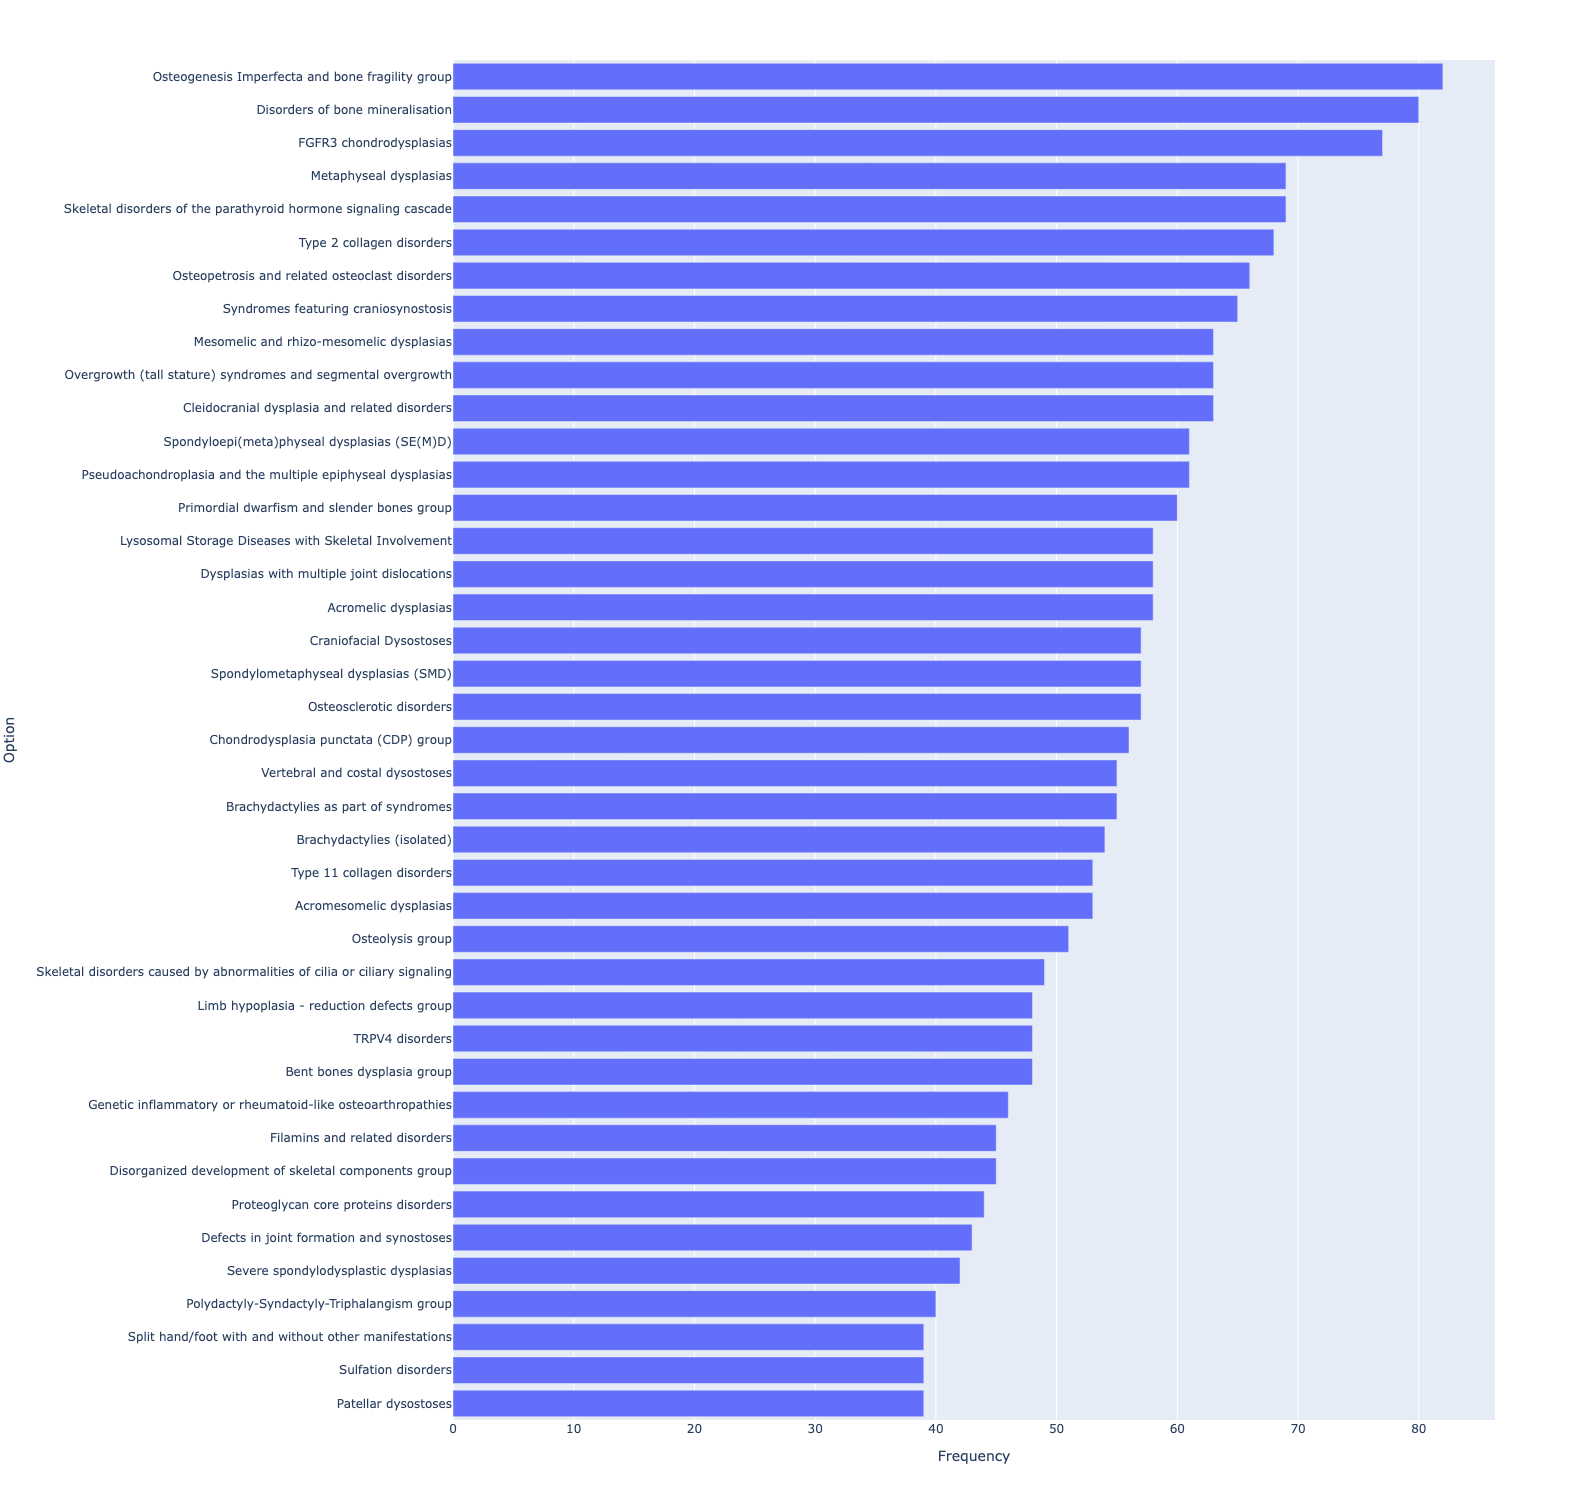

In [38]:
fig = px.bar(frequency_df, y="Option", x="Frequency", orientation='h')

# Update layout to reverse the order
fig.update_layout(
    yaxis=dict(
        categoryorder='total ascending'  # This will reverse the order
    ),
    width=1200,   # Set the width of the figure
    height=1500   # Set the height of the figure
)

fig.show()

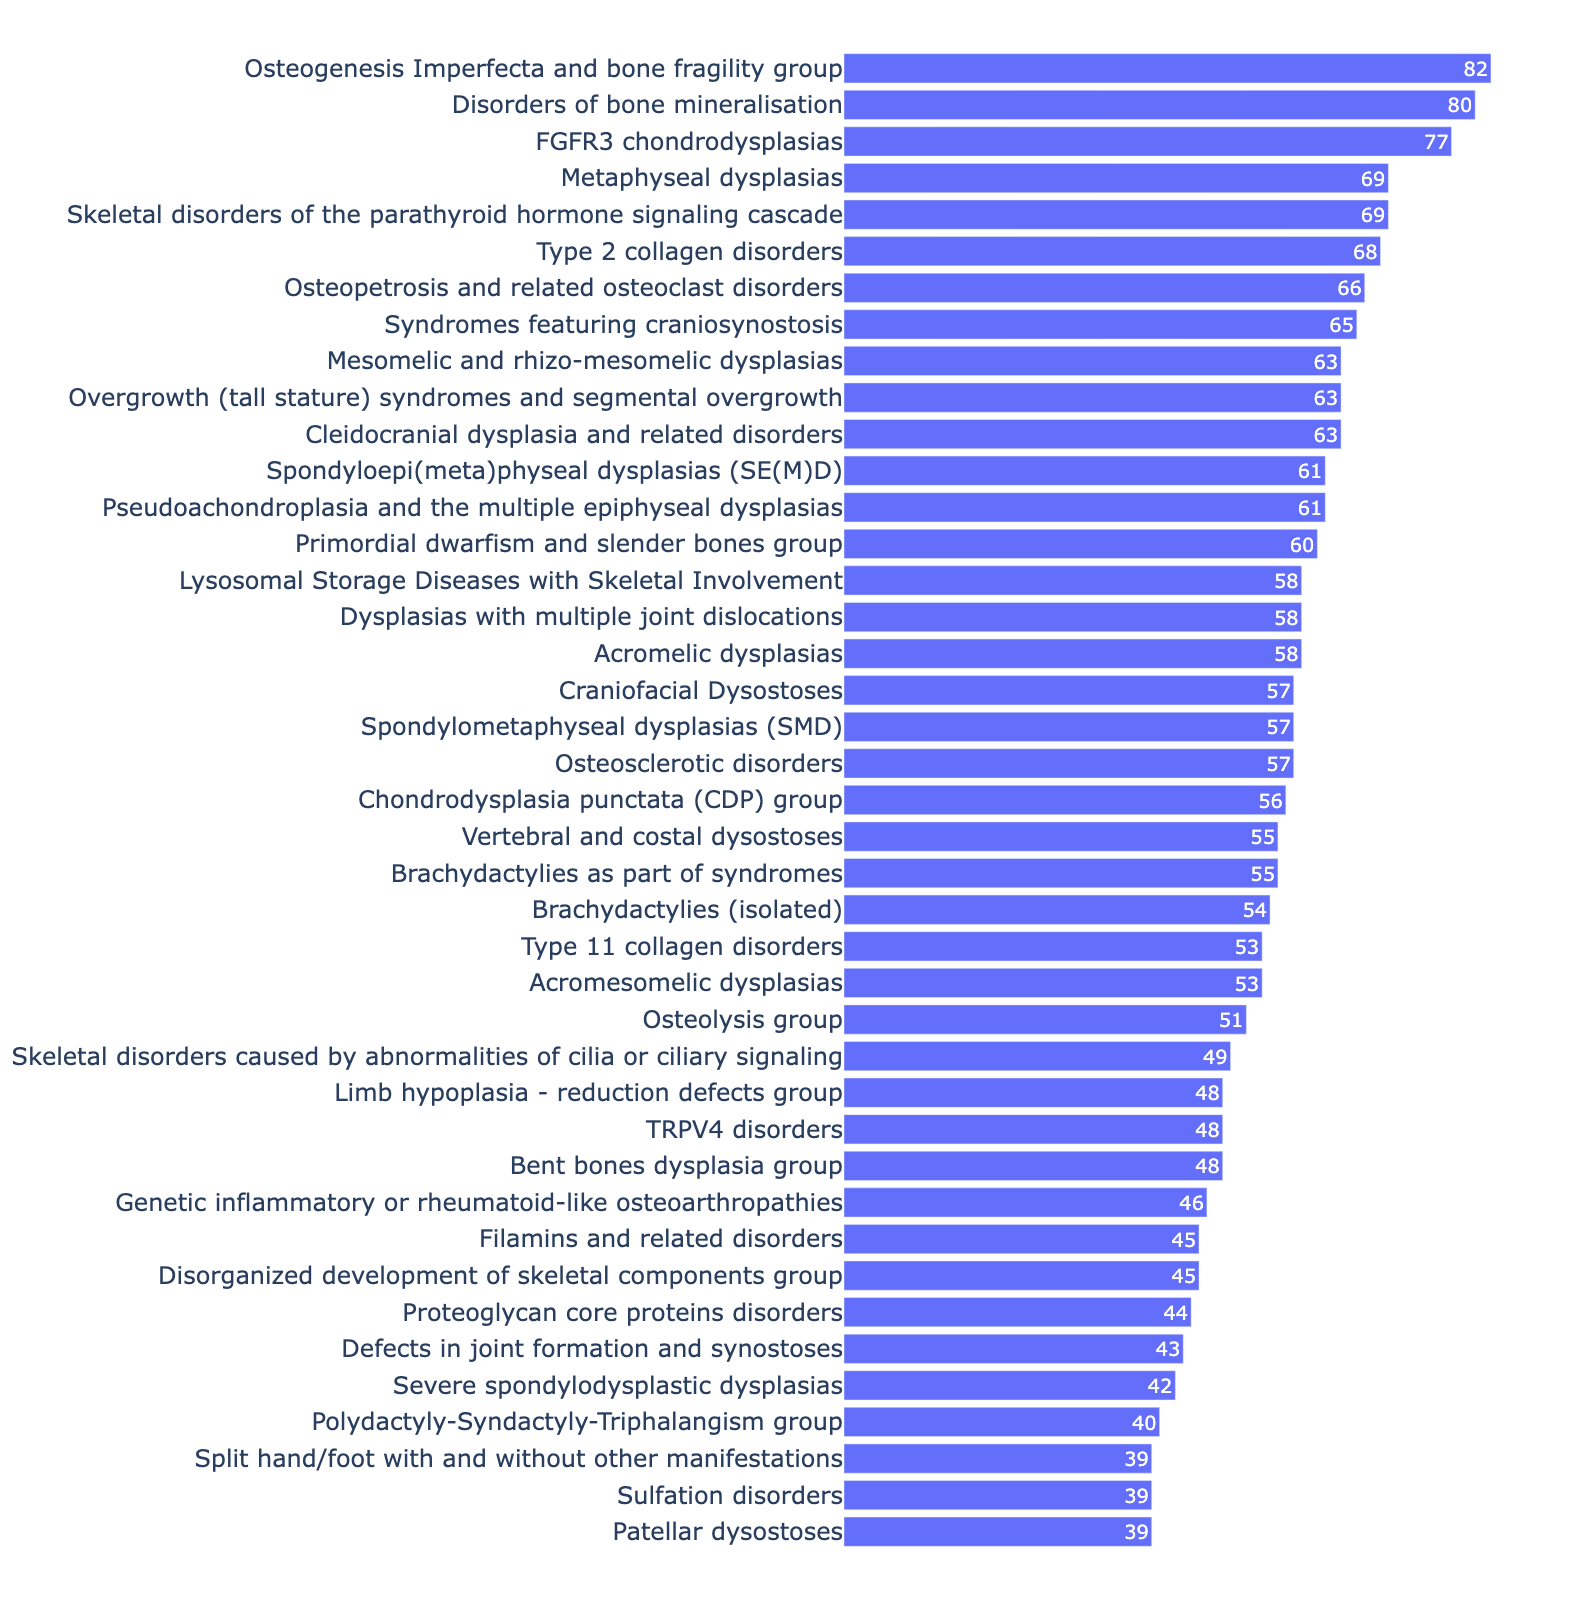

In [45]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Bar(x=frequency_df['Frequency'], y=frequency_df['Option'], orientation='h', showlegend=False, 
           text=frequency_df['Frequency'], textposition='auto', textfont=dict(size=24))

)

fig.update_xaxes(showgrid=True, zeroline=True, showline=True, linewidth=1, linecolor='black', mirror=False, tickfont=dict(size=24), visible=False)
fig.update_yaxes(showgrid=True, zeroline=True, showline=False, linewidth=1, linecolor='black', mirror=False, tickfont=dict(size=24))

fig.update_layout(
    yaxis=dict(
        categoryorder='total ascending'  # This will reverse the order
    ),
    width=1200,   # Set the width of the figure
    height=1600   # Set the height of the figure
)

fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    # title_text="Number of ...",  # Add a title to the figure
    title_x=0.5,  # Center the title horizontally
    title_font=dict(size=30),
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.show()
fig.write_image("Nosology_histogram.png", width=1200, height=1600, scale=6)